In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
import palettable
from matplotlib.colors import LogNorm

In [2]:
import yt

In [3]:
ds = yt.load('/mnt/research/SNAPhU/ceharris/run_turb/driven_spark3/driventurb_3d_hdf5_chk_0013')

yt : [INFO     ] 2020-01-31 13:31:37,740 Particle file found: driventurb_3d_hdf5_chk_0013
yt : [INFO     ] 2020-01-31 13:31:37,771 Parameters: current_time              = 6.510306380547741
yt : [INFO     ] 2020-01-31 13:31:37,771 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-01-31 13:31:37,772 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-01-31 13:31:37,773 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-01-31 13:31:37,773 Parameters: cosmological_simulation   = 0.0


In [6]:
ds.dimensionality

3

yt : [INFO     ] 2020-01-31 13:45:11,671 Projection completed
yt : [INFO     ] 2020-01-31 13:45:11,673 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-31 13:45:11,673 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-31 13:45:11,675 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-01-31 13:45:11,675 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-01-31 13:45:11,676 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



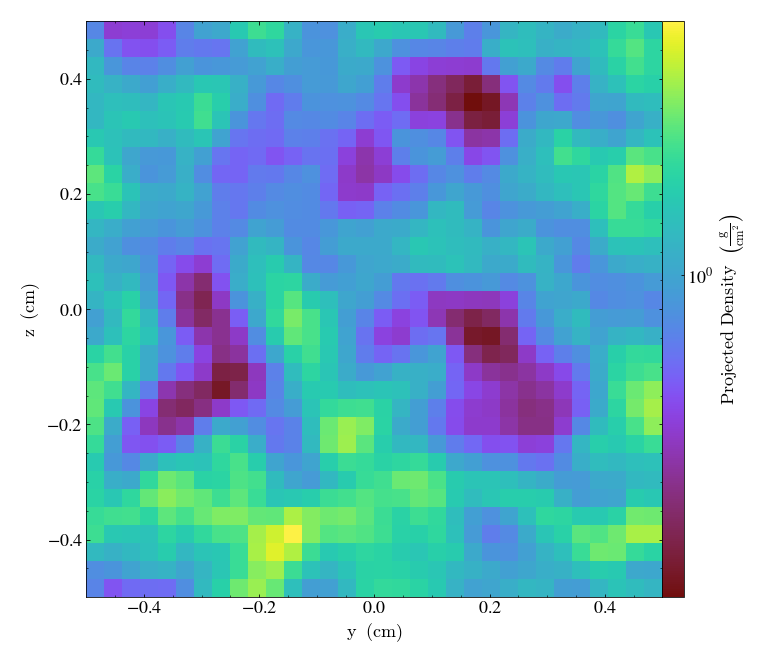

In [10]:
yt.ProjectionPlot(ds,'x','density')

```bash
for X in `seq -w 01 14`; do srun -n 1 python /mnt/research/turbulence/energy-transfer-analysis/run_analysis.py --res 32 --data_path /mnt/research/SNAPhU/ceharris/run_turb/driven_spark3/driventurb_3d_hdf5_chk_00$X  --data_type Flash --type flow --eos adiabatic --gamma 1.666667 --outfile $X.hdf5 -forced; done

In [4]:
ds.field_list

[('flash', 'accx'),
 ('flash', 'accy'),
 ('flash', 'accz'),
 ('flash', 'dens'),
 ('flash', 'eint'),
 ('flash', 'ener'),
 ('flash', 'gamc'),
 ('flash', 'game'),
 ('flash', 'pres'),
 ('flash', 'shok'),
 ('flash', 'temp'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'velz')]

In [5]:
ds.derived_field_list

[('flash', 'accx'),
 ('flash', 'accy'),
 ('flash', 'accz'),
 ('flash', 'cell_volume'),
 ('flash', 'dens'),
 ('flash', 'dx'),
 ('flash', 'dy'),
 ('flash', 'dz'),
 ('flash', 'eint'),
 ('flash', 'ener'),
 ('flash', 'gamc'),
 ('flash', 'game'),
 ('flash', 'path_element_x'),
 ('flash', 'path_element_y'),
 ('flash', 'path_element_z'),
 ('flash', 'pres'),
 ('flash', 'shok'),
 ('flash', 'temp'),
 ('flash', 'velx'),
 ('flash', 'vely'),
 ('flash', 'velz'),
 ('flash', 'vertex_x'),
 ('flash', 'vertex_y'),
 ('flash', 'vertex_z'),
 ('flash', 'x'),
 ('flash', 'y'),
 ('flash', 'z'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),

# Sample plotting notebook

## Get sample data

In [2]:
!wget https://pgrete.de/dl/EnTrans/sample_analysis_data.tgz
!mkdir sample_data
!tar xzvf sample_analysis_data.tgz -C sample_data

--2019-06-15 21:36:34--  https://pgrete.de/dl/EnTrans/sample_analysis_data.tgz
Resolving pgrete.de (pgrete.de)... 144.76.55.171
Connecting to pgrete.de (pgrete.de)|144.76.55.171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19566013 (19M) [application/x-gzip]
Saving to: ‘sample_analysis_data.tgz.1’

100%[======================================>] 19,566,013  10.4MB/s   in 1.8s   

2019-06-15 21:36:36 (10.4 MB/s) - ‘sample_analysis_data.tgz.1’ saved [19566013/19566013]

mkdir: cannot create directory ‘sample_data’: File exists
512-1.6667-1.0-0.313-0.039-0.750-0.083/0001-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.750-0.083/0002-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.750-0.083/0003-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.750-0.083/0004-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.750-0.083/0005-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.750-0.083/0006-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.750-0.083/0007-stats-512.hdf5
512-1.6667-1.0-0.313-0.039-0.

## Data location and plotting styles
### NOTE: need to be updated to reflect local directories and simulations

In [3]:
# Physics of Plasmas figure sizes
OneColWidth = 3.37
TwoColWidth = 6.69

# the style_dict key corresponds to the directory name in which the analysis data is stored
sim_dict = {
    '32' : {
        'style' : {
            'label' : 'my sample sim',
            'color' : palettable.colorbrewer.qualitative.Set1_9.mpl_colors[0],
        },
        'first_dump_id' : 1,  # id (int) of first dump to be read
        'last_dump_id' : 14,  # id (int) of last dump to be read
        'analysis_res' : 32, # resolution that was used for running the analysis
        # *dynamical or turnover* time between dumps
        # assuming equally spaced (in time) data dumps
        'time_between_dumps' : 0.05,
        # the filename pattern should include named variables for 
        # "full_data_dir" (directory), 
        # "dump" (the dump number), and
        # "res", the analysis resolution
        'filename_pattern' : '{full_data_dir:s}/{dump:02d}.hdf5',
    }            
}

# root directory of the simulation
# This currently assumes that all subdirectories (= style_dict keys) are in this single root directory
RootDir = '/mnt/research/turbulence/tmp2/' 

In [4]:
# short version all simulations
Ids = list(sim_dict.keys())

# Read statistics 

In [5]:
FlowStats = {}

In [6]:
print_missing_files_warn = False

for Id in Ids:
    
    FlowStats[Id] = {}
        
    AnaRes = sim_dict[Id]['analysis_res']
        
    FlowStats[Id][AnaRes] = {}
    readFiles = 0         

    for Dump in np.arange(sim_dict[Id]['first_dump_id'],
                          sim_dict[Id]['last_dump_id'] + 1):

        this_dir = RootDir + Id


        this_file = sim_dict[Id]['filename_pattern'].format(
            full_data_dir = this_dir,
            dump = Dump,
            res = AnaRes
        )
        if not os.path.isfile(this_file):
            if print_missing_files_warn:
                print("missing " + this_file)
            continue

        FlowStats[Id][AnaRes][Dump] = {}

        try:
            flowquant = h5py.File(this_file,"r")

            FlowStats[Id][AnaRes][Dump] = flowquant                

            readFiles += 1

        except:                    
            del FlowStats[Id][AnaRes][Dump]
            print("bad file " + File)


    print("Got %d flowQuants for %s at res %d" % (readFiles,Id,AnaRes))


Got 14 flowQuants for 32 at res 32


# Temporal evolutions
### See more examples at the end of the notebook. Also see what data is available by checkout out the `FlowAnalysis.py` file
### Note that this example assumes an MHD simulation. AlfvenicMach and density magnetic field correlation would not be available in a hydro simulation.

In [11]:
def plotEvol(Ids):
    
    quantities_to_plot = [
        ('u' + '/moments/' + 'rms','RMS $\mathrm{Ms}$',True),
        ('KinEnSpecific' + '/moments/' + 'mean','spec. kin. energy$',True),
        ('KinEnDensity' + '/moments/' + 'mean','kin. energy dens.$',True),
        #('AlfvenicMach' + '/moments/' + 'rms',r'RMS $\mathrm{Ma}$',True),                                  
        #('rho-B/corr',r'$\mathrm{Corr}[\rho,B]$',True),
    ]
    
    n_rows = len(quantities_to_plot)
    
    fig,p = plt.subplots(n_rows,1,figsize=(OneColWidth,6),sharex=True)

    for Id in Ids:
        AnaRes = sim_dict[Id]['analysis_res']


        for i, Quan in enumerate(quantities_to_plot):

                
                QuanName = Quan[0]
                Label = Quan[1]
                Lin = Quan[2]
                
                addEvolToAxis(p[i],Id,AnaRes,QuanName)
                p[i].set_ylabel(Label)
                
                if not Lin:
                    p[i].set_yscale('log')
                p[i].grid()
                
        

    p[0].legend(ncol=3,loc="lower left",bbox_to_anchor=(-0.2,1.))
    p[-1].set_xlabel('time $t$ [$T$]')
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.01,hspace=0.00)


In [12]:
def addEvolToAxis(p,Id,AnaRes,QuanName):
    tmpY = []
    tmpX = []
    for Dump in sorted(FlowStats[Id][AnaRes].keys()):
        if Dump == 0:
            continue
        tmpX.append(sim_dict[Id]['time_between_dumps']*Dump)
        tmpY.append(FlowStats[Id][AnaRes][Dump][QuanName])

    p.plot(tmpX,tmpY,**sim_dict[Id]['style'])
    

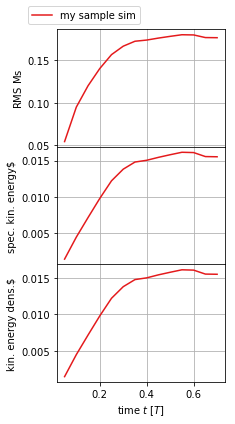

In [13]:
plotEvol(Ids)

# Spectra
## Single raw spectrum

Text(0, 0.5, 'kinetic energy power spectrum')

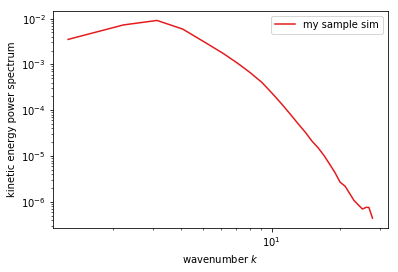

In [14]:
Id = '32'
AnaRes = 32
Dump = 14
Quan = 'rhoU' # |FT(sqrt(rho) u)|^2
Type = 'Full' # containing all modes (alternatively only rotational ('Sol') and compressive ('Dil') modes)
plt.loglog(FlowStats[Id][AnaRes][Dump][Quan + '/PowSpec/'+Type][0],
           FlowStats[Id][AnaRes][Dump][Quan + '/PowSpec/'+Type][1],
           **sim_dict[Id]['style']
          )
plt.legend()
plt.xlabel('wavenumber $k$')
plt.ylabel('kinetic energy power spectrum')

# Calculating mean spectra (after 2 dynamical times) and split

In [11]:
def getMeanSpec(Id,AnaRes,Quan,Type):
    tmp = []    
    for Dump in FlowStats[Id][AnaRes].keys():
        if Dump * sim_dict[Id]['time_between_dumps'] < 2.:
            continue
        tmp.append(FlowStats[Id][AnaRes][Dump][Quan + '/PowSpec/'+Type][1])
    return FlowStats[Id][AnaRes][Dump][Quan + '/PowSpec/'+Type][0],  np.mean(tmp,axis=0), np.std(tmp,axis=0)
        

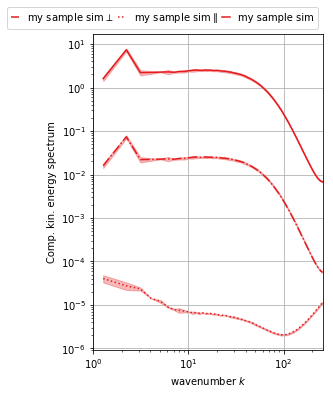

In [12]:
fig, p = plt.subplots(1,1,figsize=(TwoColWidth/1.5,TwoColWidth/1.2),sharex=True)

p = [p]

Comp = {}
Comp["rhoU"] = 4./3.
Comp["B"] = 1.7
Comp['u'] = 4./3.
Low = 7.
Up = 20.
#Comp["KinEn"] = 0.
#Comp["MagEn"] = 0.
Type = 'Full'

Types = {
    'u' : ['Sol','Dil','Full'],
    'rhoU' : ['Sol','Dil','Full'],
    'B' : ['Full']
}


LabSuf = {
    'Sol' : r'$\perp$',
    'Dil' : r'$\parallel$',
    'Full' : ''
}

LS = {
    'Sol' : '-.',
    'Dil' : ':',
    'Full' : '-'
}

for i, Quan in  enumerate(['rhoU']):
        
    for Type in Types[Quan]:
        # shift the full spectrum 2 orders up
        if Type == 'Full':
            Offset = 100.
        else:
            Offset = 1.
            
        for Id in Ids:
            AnaRes = sim_dict[Id]['analysis_res']    
            X,Y, Yerr = getMeanSpec(Id,AnaRes,Quan,Type)

            mask = np.logical_and(X < AnaRes/2,X != 0.)
                        
            p[i].plot(X[mask],Offset * X[mask]**Comp[Quan]*Y[mask],
                     ls=LS[Type],
                      color=sim_dict[Id]['style']['color'],
                      label=sim_dict[Id]['style']['label'] + LabSuf[Type],
                     )
                        
            p[i].fill_between(X[mask],
                              Offset * X[mask]**Comp[Quan] * (Y[mask] - Yerr[mask]),
                              Offset * X[mask]**Comp[Quan] * (Y[mask] + Yerr[mask]),
                             alpha=0.3,color=sim_dict[Id]['style']['color'])


for i in range(1):
    p[i].set_xlim(1.,AnaRes/2)
    p[i].set_xscale("log")
    p[i].set_yscale("log")

p[0].set_ylabel("Comp. kin. energy spectrum")
p[0].set_xlabel("wavenumber $k$")
p[0].legend(loc="lower right",ncol=5,
            handlelength=0.75,
            columnspacing=0.5,
            #fontsize=8,
            bbox_to_anchor=(1.,1.))

p[0].grid()


fig.tight_layout()
fig.subplots_adjust(wspace=0.05,hspace=0.00)

### Including magnetic energy spectrum

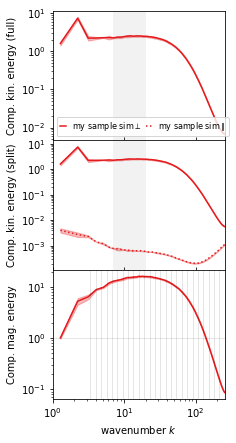

In [13]:
fig, p = plt.subplots(3,1,figsize=(OneColWidth,OneColWidth/1.6 * 3.),sharex=True)

Comp = {}
Comp["rhoU"] = 4./3.
Comp["B"] = 1.7
Comp['u'] = 4./3.
Low = 7.
Up = 20.
#Comp["KinEn"] = 0.
#Comp["MagEn"] = 0.
Type = 'Full'

Types = {
    'u' : ['Sol','Dil'],
    'rhoU' : ['Sol','Dil'],
    'B' : ['Full']
}


LabSuf = {
    'Sol' : r'$\perp$',
    'Dil' : r'$\parallel$',
    'Full' : ''
}

LS = {
    'Sol' : '-',
    'Dil' : ':',
    'Full' : '-'
}

for i, Quan in  enumerate(['rhoU',"rhoU","B"]):
        
    for Type in Types[Quan]:

        if i == 0:
            if Type == 'Dil':
                continue
            Type = 'Full'
            
        for Id in Ids:
            AnaRes = sim_dict[Id]['analysis_res']
            X,Y, Yerr = getMeanSpec(Id,AnaRes,Quan,Type)


            mask = np.logical_and(X < AnaRes/2,X != 0.)
            p[i].plot(X[mask],Offset * X[mask]**Comp[Quan]*Y[mask],
                     ls=LS[Type],
                      color=sim_dict[Id]['style']['color'],
                      label=sim_dict[Id]['style']['label'] + LabSuf[Type],
                     )
            
            
            p[i].fill_between(X[mask],
                              Offset * X[mask]**Comp[Quan] * (Y[mask] - Yerr[mask]),
                              Offset * X[mask]**Comp[Quan] * (Y[mask] + Yerr[mask]),
                             alpha=0.3,color=sim_dict[Id]['style']['color'])

for i in range(2):
    p[i].axvspan(Low,Up, facecolor='black', alpha=0.05)

RESexp = np.log(AnaRes/8)/np.log(2) * 4 + 1
BinsEdges = np.concatenate((np.array([0.]),
        4.* 2** ((np.arange(0,RESexp + 1) - 1.) /4.)))

for X in BinsEdges:
    p[2].axvline(X,color="black",alpha=0.2,lw=0.5)
                     
for i in range(3):
    p[i].set_xlim(1.,AnaRes/2)
    p[i].set_xscale("log")
    p[i].set_yscale("log")


p[2].axhline(1.,color="black",alpha=0.2,lw=0.5)

p[0].set_ylabel("Comp. kin. energy (full)")
p[1].set_ylabel("Comp. kin. energy (split)")
p[2].set_ylabel("Comp. mag. energy")
p[2].set_xlabel("wavenumber $k$")

p[0].tick_params(axis='x', direction='in')
p[0].tick_params(axis='x',tickdir='in')
p[1].tick_params(axis='x', direction='in')
p[1].tick_params(axis='x',tickdir='in')

p[1].legend(loc="lower left",ncol=4,
            handlelength=0.75,
            columnspacing=0.5,
            fontsize=8,bbox_to_anchor=(0.,1.))


fig.tight_layout()
fig.subplots_adjust(wspace=0.05,hspace=0.00)

# Histograms

####  again taking the mean histogram for t > 2T
#### IMPORTANT: for this to work properly all histograms are required to use the same binning, i.e., the `--extrema_file` option was used in the analysis

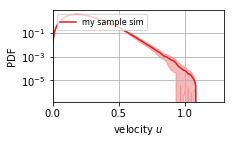

In [14]:
HistBins = 'globalMinMax'
def getMeanHist(Id,AnaRes,Quan):
    tmp = []    
    for Dump in FlowStats[Id][AnaRes].keys():
        if Dump * sim_dict[Id]['time_between_dumps'] < 2.:
            continue
        X = FlowStats[Id][AnaRes][Dump][Quan + '/hist/' + HistBins + 'MinMax'][0]
        Vals = FlowStats[Id][AnaRes][Dump][Quan + '/hist/' + HistBins + 'MinMax'][1]
                
        TotSum = np.sum((X[1]-X[0])*Vals)
            
        tmp.append(Vals/TotSum)
    return (X,
            np.mean(tmp,axis=0), np.std(tmp,axis=0))
        
Quans = ['u']
NumRows = len(Quans)

fig, p = plt.subplots(NumRows,1,figsize=(OneColWidth,OneColWidth/1.6*NumRows))
if NumRows == 1:
    p = [p]
for i, Quan in enumerate(Quans):
    for Id in Ids:
        
        X,Y,YStd = getMeanHist(Id,AnaRes,Quan)
        
        
        p[i].plot(X[:-1],Y[:-1],**sim_dict[Id]['style'])
        p[i].fill_between(X,
                          Y - YStd,
                          Y + YStd,
                         alpha=0.3,
                         color = sim_dict[Id]['style']['color'])        

    p[i].set_ylabel('PDF')

for i in range(NumRows):
    p[i].grid()
    p[i].set_xlabel('velocity $u$')

p[i].set_yscale('log')
p[i].set_xlim(0.,1.3)
p[0].legend(loc='upper left',bbox_to_anchor=(0.,1.),ncol=3,fontsize=8)
fig.tight_layout()


#### Similarly, if we want to have an instantaneous histogram we just pick a Dump (here Dump 60).
#### IMPORTANT: this does *not* require the use of `--extrema_file` as we use the `HistBins = 'Snap'` option (i.e., binning is per snapshot)

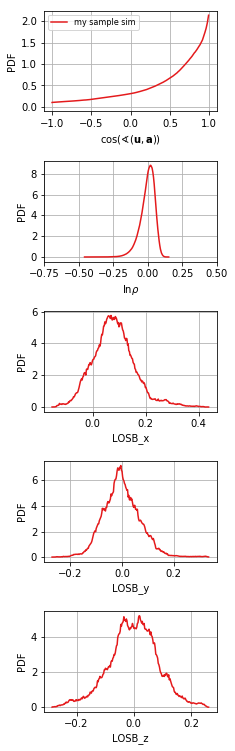

In [15]:
#HistBins = 'globalMinMax'
HistBins = 'Snap'
def getMeanHist(Id,AnaRes,Quan):
    tmp = []    
    for Dump in FlowStats[Id][AnaRes].keys():
        if Dump != 60:
            continue
        X = FlowStats[Id][AnaRes][Dump][Quan + '/hist/' + HistBins + 'MinMax'][0]
        Vals = FlowStats[Id][AnaRes][Dump][Quan + '/hist/' + HistBins + 'MinMax'][1]                
        TotSum = np.sum((X[1]-X[0])*Vals)
            
        tmp.append(Vals/TotSum)
    return (X,
            np.mean(tmp,axis=0), np.std(tmp,axis=0))
        
Quans = ['Angle_u_a',
         'lnrho',
         'LOSB_x',
         'LOSB_y',
         'LOSB_z',
        ]
NumRows = len(Quans)

fig, p = plt.subplots(NumRows,1,figsize=(OneColWidth,OneColWidth/1.6*NumRows))
if NumRows == 1:
    p = [p]
for i, Quan in enumerate(Quans):
    for Id in Ids:
        
        X,Y,YStd = getMeanHist(Id,AnaRes,Quan)
        
        
        p[i].plot(X[:-1],Y[:-1],**sim_dict[Id]['style'])        
        p[i].fill_between(X,
                          Y - YStd,
                          Y + YStd,
                         alpha=0.3)        

    p[i].set_ylabel('PDF')
    p[i].set_xlabel(Quan)

for i in range(NumRows):
    p[i].grid()

p[0].set_xlabel('$\cos(\sphericalangle(\mathbf{u},\mathbf{a}))$')
p[1].set_xlabel(r'$\ln \rho$')
#p[1].set_yscale('log')    
p[0].legend(loc='upper left',bbox_to_anchor=(0.,1.),ncol=3,fontsize=8)
p[1].set_xlim(-0.75,0.5)
fig.tight_layout()



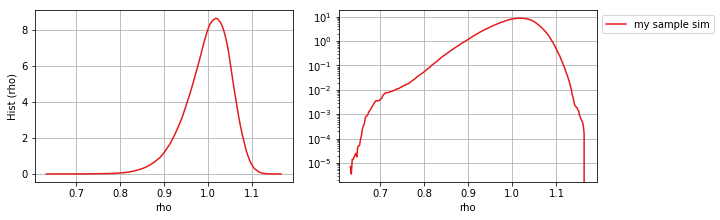

In [16]:
HistBins = 'Snap'
def getMeanHist(Id,AnaRes,Quan):
    tmp = []    
    for Dump in FlowStats[Id][AnaRes].keys():
        if Dump != 60:
            continue
        X = FlowStats[Id][AnaRes][Dump][Quan + '/hist/' + HistBins + 'MinMax'][0]
        Vals = FlowStats[Id][AnaRes][Dump][Quan + '/hist/' + HistBins + 'MinMax'][1]
        tmp.append(Vals/np.sum((X[1]-X[0])*Vals))
    return (X,
            np.mean(tmp,axis=0), np.std(tmp,axis=0))
        
Quans = ['rho']
NumRows = len(Quans)

fig, p = plt.subplots(NumRows,2,figsize=(3.*OneColWidth,1.5*OneColWidth/1.6))
#if NumRows == 1:
#    p = [p]
for i, Quan in enumerate(Quans):
    for Id in Ids:
        
        X,Y,YStd = getMeanHist(Id,AnaRes,Quan)
        p[0].plot(X,Y,**sim_dict[Id]['style'])
        p[1].plot(X,Y,**sim_dict[Id]['style'])
     

    p[i].set_ylabel('Hist (%s)' % Quan)

for i in range(2):
    p[i].grid()
    p[i].set_xlabel(Quan)
p[1].set_yscale('log')    
p[1].legend(loc='upper left',bbox_to_anchor=(1.,1.))
fig.tight_layout()



# 2d hist

#### Careful: numpy hist2d data is transposed with respect to plotting functions as pcolormesh

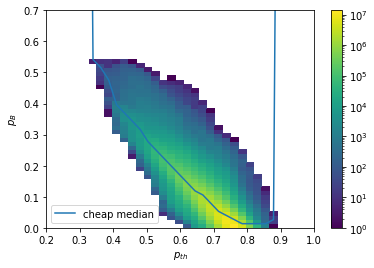

In [17]:
field = 'P-MagEnDensity'
stat = 'globalMinMaxMinMax'
Dump = 60
bla = FlowStats[Ids[-1]][AnaRes][Dump][field + '/hist/' + stat]
X, Y = np.meshgrid(bla['edges'][0], bla['edges'][1])
Z = np.array(bla['counts']).T
plt.pcolormesh(X,Y,Z,
               norm=LogNorm())

X = (bla['edges'][0][1:] + bla['edges'][0][:-1])/2.
Med = []
for i in range(len(Z[:,0])):
    # sum over columns
    totCells = np.sum(Z[:,i]) 
    for j in range(len(Z[:,i])):
        if np.sum(Z[:j,i]) > np.sum(Z[j:,i]):
            break
    Med.append(bla['edges'][1][j])                    
        
plt.plot(X,Med,label='cheap median')
plt.legend()
plt.xlabel('$p_{th}$')
plt.ylabel('$p_{B}$')
plt.xlim(0.2,1.0)
plt.ylim(0.,0.7)
plt.colorbar()

# the total messy overview 

In [18]:
FieldNames = ['rho',
              'lnrho',
              'u',
              'a',
              'AbsDivU',
              'AbsRotU',
              'B',
              'AlfvenicMach',
              'plasmabeta',
              'DM_x',
              'DM_y',
              'DM_z',
              'RM_x',
              'RM_y',
              'RM_z',
              'lnDM_x',
              'lnDM_y',
              'lnDM_z',              
             ]

In [19]:
FieldNames += ['TotPres',
              'LOSB_x',
              'LOSB_y',
              'LOSB_z',
             ]

In [20]:
FieldNames += ['Angle_u_a',
              'Angle_uSol_a',
              'Angle_uDil_a',            
             ]

In [21]:
Stats = [
    'mean',    
    'stddev',
    'rms',
    'skew',
    'kurt',
#    'min',
#    'max'
]

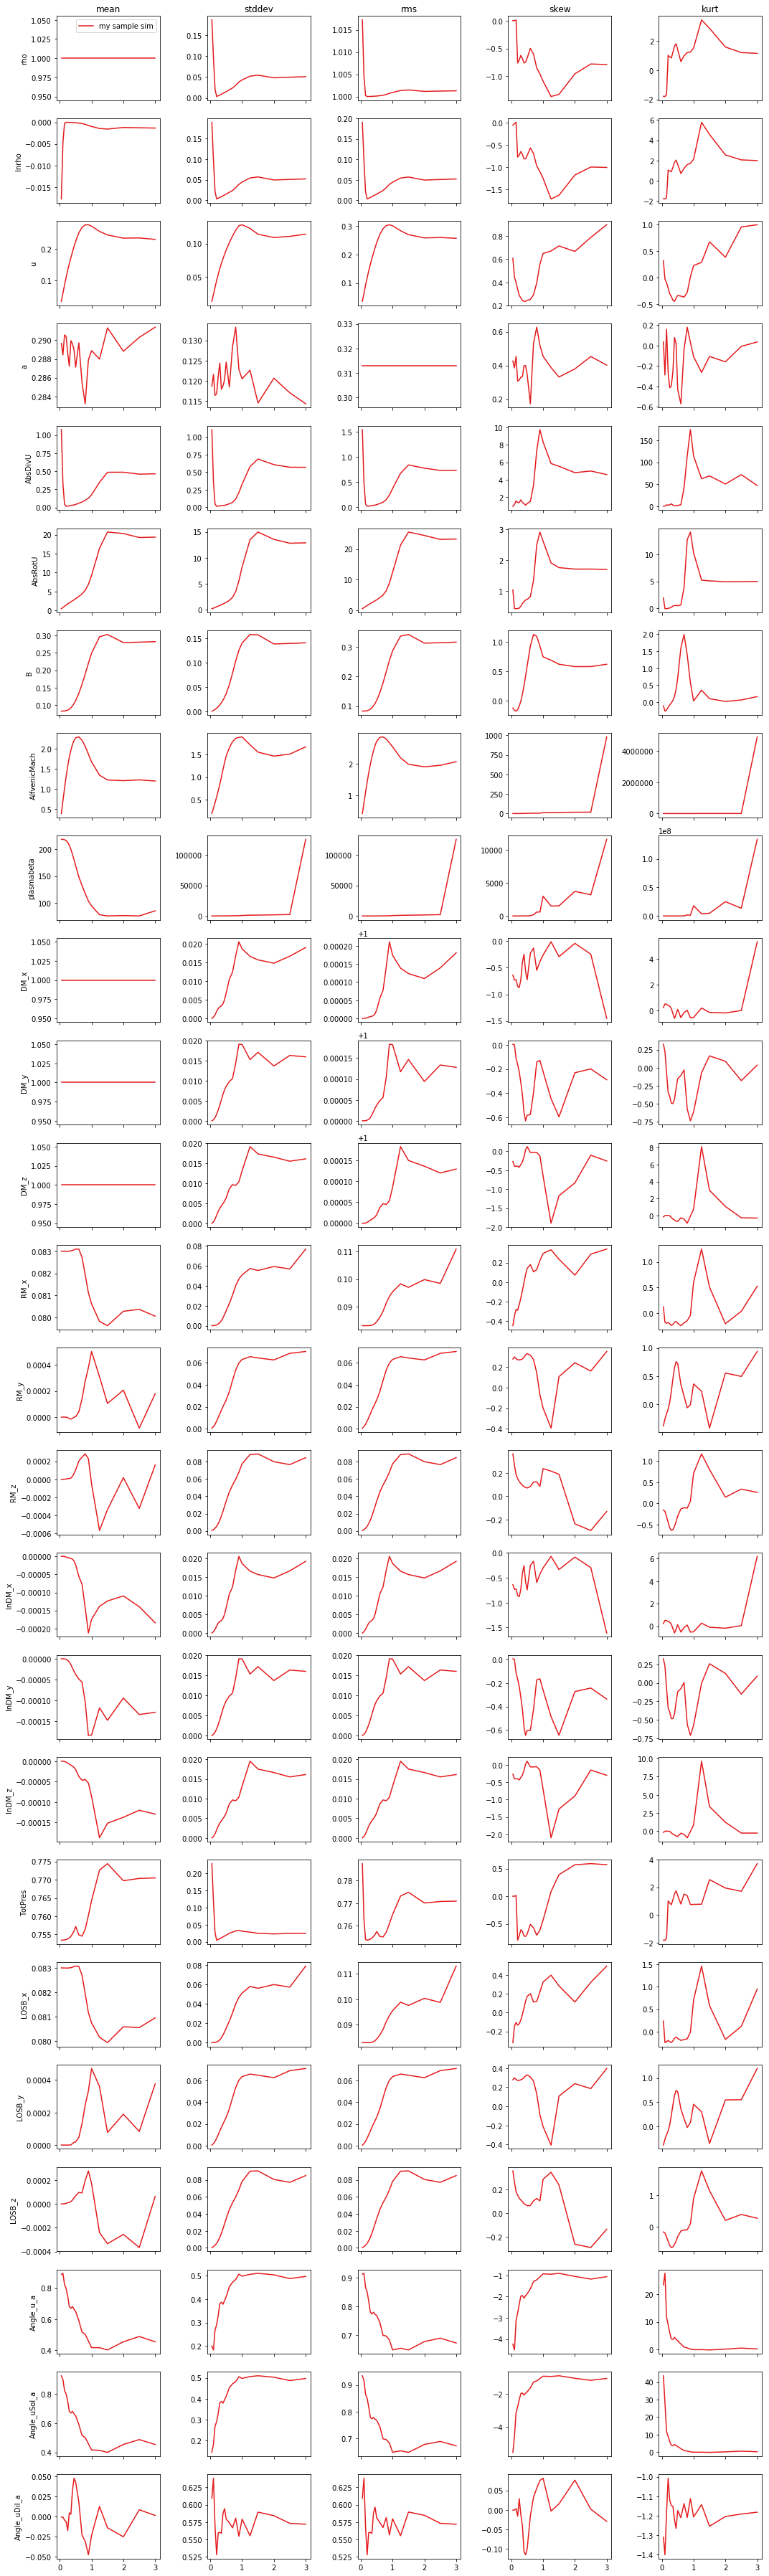

In [22]:
NumRows = len(FieldNames)
NumCols = len(Stats)

fig,p = plt.subplots(NumRows,NumCols,figsize=(3*NumCols,2*NumRows),sharex=True)
for i,field in enumerate(FieldNames):
    for j, stat in enumerate(Stats): 
        globMin = 1e30
        globMax = -1e30
        for Id in Ids:
            AnaRes = sim_dict[Id]['analysis_res']
            tmpY = []          
            tmpX =[]        
            for Dump in sorted(FlowStats[Id][AnaRes].keys()):
                
                tmpX.append(float(Dump) * sim_dict[Id]['time_between_dumps'])
                tmpY.append(FlowStats[Id][AnaRes][Dump][field + '/moments/' + stat])

            if np.min(tmpY) < globMin:
                globMin = np.min(tmpY)
            if np.max(tmpY) > globMax:
                globMax = np.max(tmpY)            

            p[i,j].plot(tmpX,tmpY,**sim_dict[Id]['style'])
            
        if i == 0:
            p[i,j].set_title(stat)
        if j == 0:
            p[i,j].set_ylabel(field)
        
    #print("'%s' : [%.5g,%.5g]," % (field,globMin,globMax))    
    
        
    #p[i,0].set_ylabel(field)
    
p[0,0].legend()    
fig.tight_layout()
#fig.subplots_adjust(wspace=0.01,hspace=0.00)    


# Get global min/max (may be used to determine histogram bounds in script)

'rho' : [0.56756,1.2255],
'lnrho' : [-0.56641,0.20338],
'u' : [8.228e-05,1.1394],
'a' : [0.00014503,0.8819],
'AbsDivU' : [0,70.575],
'AbsRotU' : [0.00085331,258.33],
'B' : [3.3022e-05,1.1157],
'AlfvenicMach' : [0.00048075,8500.1],
'plasmabeta' : [0.52966,1.4509e+09],
'DM_x' : [0.87153,1.0518],
'DM_y' : [0.9272,1.0527],
'DM_z' : [0.84559,1.0506],
'RM_x' : [-0.15215,0.39613],
'RM_y' : [-0.26887,0.31753],
'RM_z' : [-0.31664,0.38226],
'lnDM_x' : [-0.13751,0.050512],
'lnDM_y' : [-0.075586,0.051323],
'lnDM_z' : [-0.16772,0.049353],
'TotPres' : [0.48024,1.0784],
'LOSB_x' : [-0.15406,0.43975],
'LOSB_y' : [-0.27918,0.33718],
'LOSB_z' : [-0.3363,0.41971],
'Angle_u_a' : [-1,1],
'Angle_uSol_a' : [-1,1],
'Angle_uDil_a' : [-1,1],


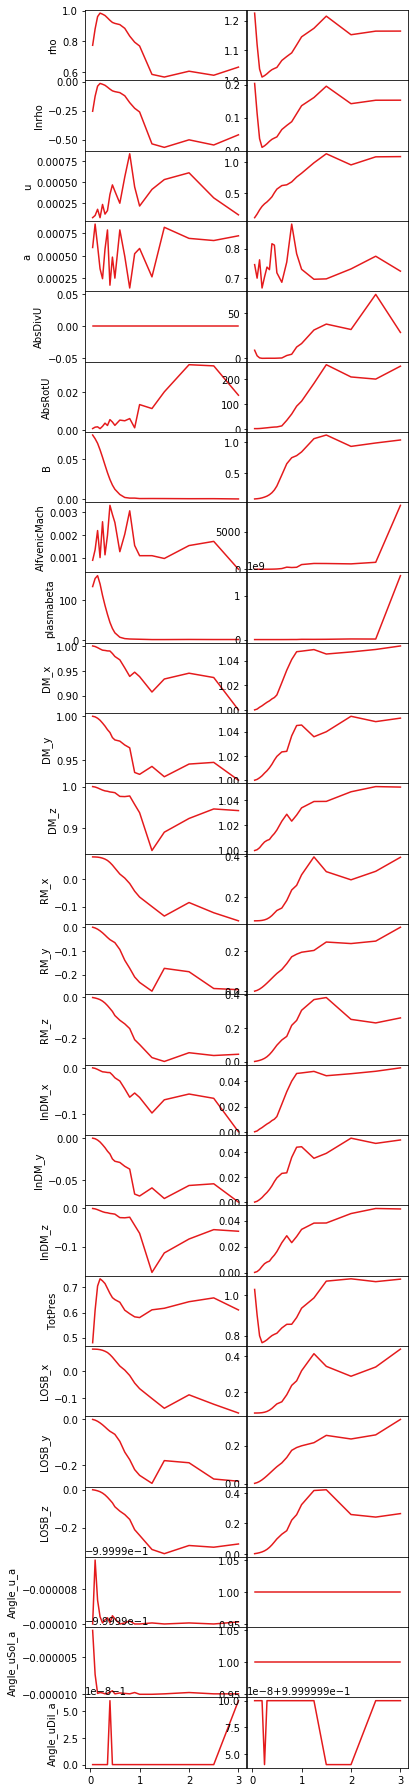

In [23]:

fig,p = plt.subplots(len(FieldNames),2,figsize=(6,len(FieldNames)),sharex=True)
for i,field in enumerate(FieldNames):
    globMin = 1e30
    globMax = -1e30
    for Id in Ids:
        AnaRes = sim_dict[Id]['analysis_res']
        tmpMax = []
        tmpMin = []
        tmpX =[]        
        for Dump in sorted(FlowStats[Id][AnaRes].keys()):
            if Dump == 0:
                #print("skipping first dump")
                continue
            tmpX.append(float(Dump) * sim_dict[Id]['time_between_dumps'])
            tmpMax.append(FlowStats[Id][AnaRes][Dump][field + '/moments/max'])
            tmpMin.append(FlowStats[Id][AnaRes][Dump][field + '/moments/min'])

        if np.min(tmpMin) < globMin:
            globMin = np.min(tmpMin)
        if np.max(tmpMax) > globMax:
            globMax = np.max(tmpMax)            
        
        p[i,0].plot(tmpX,tmpMin,**sim_dict[Id]['style'])
        p[i,1].plot(tmpX,tmpMax,**sim_dict[Id]['style'])
        
    print("'%s' : [%.5g,%.5g]," % (field,globMin,globMax))    
    
        
    p[i,0].set_ylabel(field)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.01,hspace=0.00)    